In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
import gzip
import polars as pl

from walrus_workshop.well import WellDataSet
from walrus_workshop.activation import ActivationsDataSet

In [28]:
# 
layer_name = "blocks.20.space_mixing.activation"

In [29]:
dataset = WellDataSet(name="shear_flow", split="train", source_split="train")
activations = ActivationsDataSet(name="shear_flow", layer_name=layer_name, split="train", source_split="train")

In [30]:
# Load MAE dictionary
with gzip.open(os.path.join("maes", layer_name, f"top_features_{layer_name}_num180_k20.pkl.gz"), "rb") as f:
    maes = pickle.load(f)
print(type(maes), f"number of features in the SAE: {len(maes)}")
print(maes[list(maes.keys())[0]].keys())


<class 'dict'> number of features in the SAE: 29537
dict_keys(['top_scores', 'top_indices', 'file'])


In [31]:
df = pl.DataFrame({'scores': [score for f in maes.values() for score in f["top_scores"]],
                   'indices': [index for f in maes.values() for index in f["top_indices"]]})
# now add an index column
df = df.with_columns(pl.arange(0, len(df)).alias("index"))
df.head()


scores,indices,index
f64,i64,i64
0.231657,2189,0
0.231446,662,1
0.230683,351,2
0.233148,1654,3
0.251017,1216,4


Bad pipe message: %s [b'\xf8\x99|f\xc3W\xd3\x07X\x97\x9e\xe6\xeec\x9fDT\x85\x00\x01|\x00\x00\x00\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00\x07\x00\x08\x00\t\x00\n\x00\x0b\x00\x0c\x00\r\x00\x0e\x00\x0f\x00\x10\x00\x11\x00\x12\x00\x13\x00\x14\x00\x15\x00\x16\x00\x17\x00\x18\x00\x19\x00\x1a\x00\x1b\x00/\x000\x001\x002\x003\x004\x005\x006\x007\x008\x009\x00:\x00;\x00<\x00=\x00>\x00?\x00@\x00A\x00B\x00C\x00D\x00E\x00F\x00g\x00h\x00i\x00j\x00k\x00l\x00m\x00\x84\x00\x85\x00\x86\x00\x87\x00\x88\x00\x89\x00\x96\x00\x97\x00\x98\x00\x99\x00\x9a\x00\x9b\x00\x9c\x00\x9d\x00\x9e\x00\x9f\x00\xa0\x00\xa1\x00\xa2\x00\xa3\x00\xa4\x00\xa5\x00\xa6\x00\xa7\x00\xba\x00\xbb\x00\xbc\x00']
Bad pipe message: %s [b"\xbe\x00\xbf\x00\xc0\x00\xc1\x00\xc2\x00\xc3\x00\xc4\x00\xc5\x13\x01\x13\x02\x13\x03\x13\x04\x13\x05\xc0\x01\xc0\x02\xc0\x03\xc0\x04\xc0\x05\xc0\x06\xc0\x07\xc0\x08\xc0\t\xc0\n\xc0\x0b\xc0\x0c\xc0\r\xc0\x0e\xc0\x0f\xc0\x10\xc0\x11\xc0\x12\xc0\x13\xc0\x14\xc0\x15\xc0\x16\xc0\x17\xc0\x18\xc0\x19\x

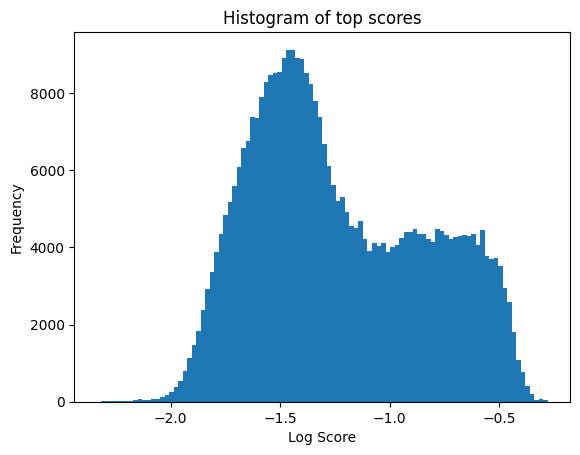

In [23]:
plt.hist(np.log10(df["scores"]), 100)
plt.xlabel("Log Score")
plt.ylabel("Frequency")
plt.title("Histogram of top scores")
plt.show()




In [22]:
# get the index of df with the largest score
df_sort = df.sort("scores", descending=True)
df_sort


scores,indices,index
f64,i64,i64
0.527854,5876,33857
0.526387,5364,33868
0.52581,5193,33863
0.525764,4820,33854
0.52568,5705,33864
…,…,…
0.005011,5628,306883
0.004904,5999,306868
0.004871,5685,306880
